In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types
from main.data_tools.query_dataframes import cut_dfs_4types


Welcome to JupyROOT 6.26/04


In [15]:
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/Belle_study/ntuple_massvetov2_b2bii_stream10_5_presel/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/Belle_study/ntuple_massvetov2_b2bii_stream11_4_presel/'



In [16]:
Vgamma_ccbar = base_file_loc + 'charm/*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

Vgamma_uds = base_file_loc + 'uds/*.root'
Vgamma_charged = base_file_loc + 'charged/*.root'
Vgamma_mixed = base_file_loc + 'mixed/*.root'


In [17]:
base_filter=' D0_M>1.68 && D0_M<2.05'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.00046 && Dstarp_CMS_p>2.5'
base_filter+=' && gamma_E>0.42'

# cut value=(0.32, 0.52, 0.0008)
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && Dstarp_isSignal!=1'
# base_filter+='&& gamma_E>0.32 && Pi0_Prob2>0.52'
variables=['__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','Dstarp_chiProb','D0_M','D0_cosHel_0','Rho_M','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','D0_flightDistance','D0_flightDistanceErr']
# variables+=['Pi0_Prob2']
tree='rho'

In [18]:
# pd_Vgamma_ccbar = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter + ' && ',variables=variables)

pd_Vgamma_ccbar = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_uds = get_pd(file=Vgamma_uds, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_charged = get_pd(file=Vgamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_mixed = get_pd(file=Vgamma_mixed, tree=tree,base_filter=base_filter,variables=variables)


In [19]:
# pd_ccbar_signal = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter + '&& Dstarp_isSignal==1',variables=variables)
# cut value=(0.32, 0.52, 0.0008)
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && Dstarp_isSignal==1'
# base_filter+='&& gamma_E>0.32 && Pi0_Prob2>0.52'
# pd_ccbar_signal = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter ,variables=variables)

In [20]:
pd_ccbar = pd_Vgamma_ccbar.reset_index(drop=True)
pd_uds = pd_Vgamma_uds.reset_index(drop=True)
pd_charged = pd_Vgamma_charged.reset_index(drop=True)
pd_mixed = pd_Vgamma_mixed.reset_index(drop=True)


In [21]:
pd_ccbar['rank'] = pd_ccbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_uds['rank'] = pd_uds.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_charged['rank'] = pd_charged.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_mixed['rank'] = pd_mixed.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')


In [22]:
# multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uds[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates())
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uds[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) 

print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

61900
60951
1.0155698840051846


In [23]:
# plt.hist(pd_ccbar.D0_M, bins=np.linspace(1.68,2.05,51));

# plt.hist(pd_ccbar_signal.D0_M, bins=np.linspace(1.68,2.05,51));

# plt.xlim(1.68,2.05)

In [24]:
cut = 'gamma_E>0.48 & Belle2Pi0Veto_75MeV >0.022'
cut = 'gamma_E>0.0'
# cut = 'rank==1'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uds,pd_charged, pd_mixed = cut_dfs_4types(cut, pd_ccbar, pd_uds,pd_charged, pd_mixed)

[1754. 1661. 1669. 1665. 1646. 1631. 1649. 1651. 1678. 1576. 1634. 1619.
 1563. 1627. 1644. 1705. 1762. 1784. 1882. 1971. 1918. 1913. 1781. 1583.
 1408. 1157.  985.  919.  879.  825.  801.  860.  812.  728.  801.  735.
  744.  741.  697.  752.  707.  689.  760.  681.  716.  715.  668.  750.
  713.  691.]
fitst_bin_entries=1754.0


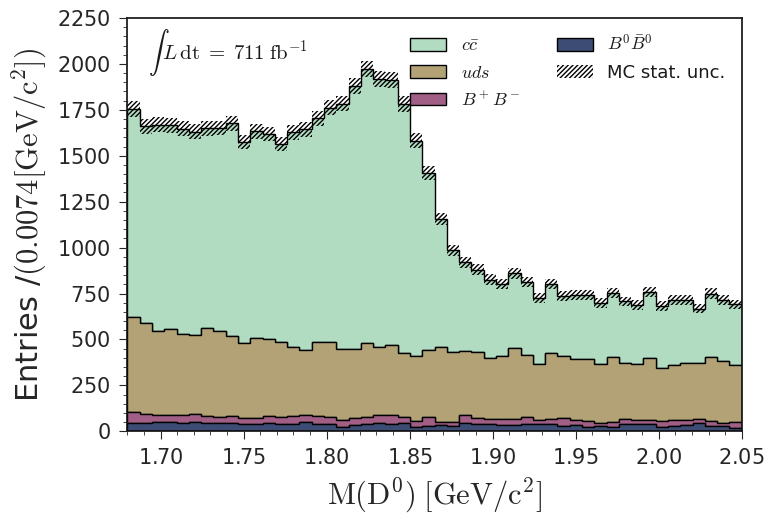

In [25]:
labels = [ r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$uds$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_mixed[var], pd_charged[var],pd_uds[var], pd_ccbar[var]]  


scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]", luminosity="$711\; \mathrm{fb}^{-1}$")
plt.tight_layout()
plt.savefig("/media/jykim/T7/saved_plots/belle_vs_belleII/generic/Belle_rho_4S_optimzied_nopi0veto_D0_stream11_4.png")

[1735. 1612. 1552. 1606. 1785. 1970. 2112. 2401. 2405. 2252. 1841. 1516.
 1202. 1097. 1009.  915.  872.  792.  780.  760.  743.  746.  710.  688.
  690.  717.  708.  694.  755.  761.  712.  784.  806.  802.  792.  956.
  951. 1071. 1107. 1260. 1416. 1547. 1535. 1455. 1443. 1359. 1378. 1426.
 1483. 2191.]
fitst_bin_entries=1735.0


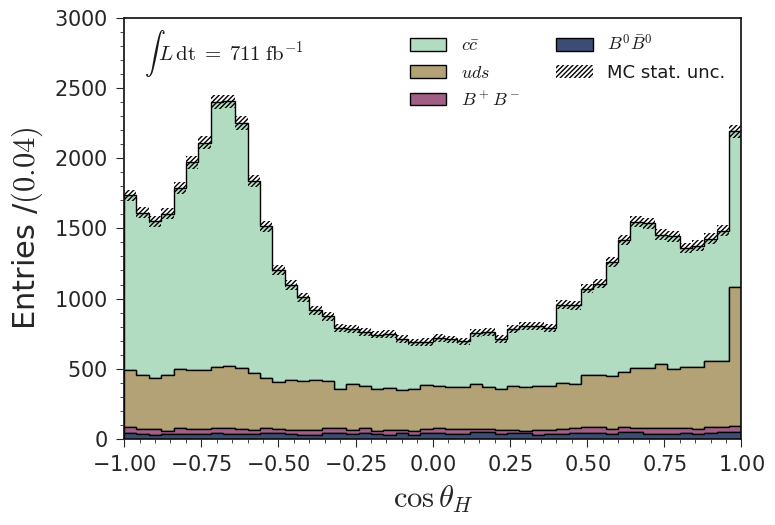

In [26]:
labels = [ r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$uds$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_cosHel_0'
data  = [pd_mixed[var], pd_charged[var],pd_uds[var], pd_ccbar[var]]  


scale = 1
xrange = (-1,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = r"$\cos\theta_H$"
luminosity="$711\; \mathrm{fb}^{-1}$"
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity)
plt.tight_layout()
plt.savefig("/media/jykim/T7/saved_plots/belle_vs_belleII/generic/Belle_rho_4S_optimzied_nopi0veto_cosHel_stream11_4.png")

[35557. 17870.  4765.  2273.  1064.]
fitst_bin_entries=35557.0


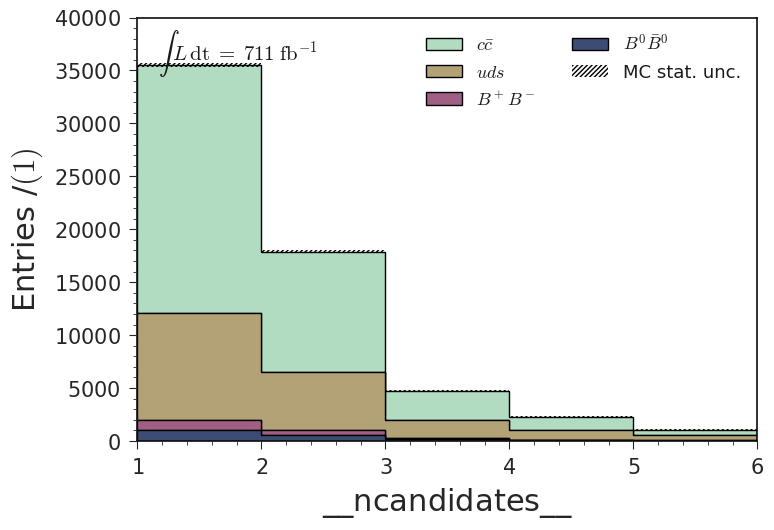

In [27]:
labels = [ r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$uds$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = '__ncandidates__'
data  = [pd_mixed[var], pd_charged[var],pd_uds[var], pd_ccbar[var]]  


scale = 1
xrange = (1,6)
force_range = (1,6)
# xrange = (1.8,1.9)

nbins = 5
xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range,luminosity=luminosity)
# plt.savefig("MC15rd_phi_1ab_optimized_ncandidates.png")